<a href="https://colab.research.google.com/github/pascalisnala/skripsi-machinelearning/blob/master/skripsi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Drowsiness Detection Using LSTM in Tensorflow and Keras
Driving in a drowsy condition is one of the main causes of traffic accidents.

In this notebook, a neural network model is created using LSTM that is able to detect whether driver is in a sleepy condition



#### 0. Adding Resources





<br>

###### 0.1. Library Import
import useful libraries which needed to work on this project

In [2]:
### useful libraries

## algebra and matrix operation
import numpy as np
from collections import deque

## dataframe
import pandas as pd

## data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## machine learning
# data preprocessing
from sklearn import preprocessing
# model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
# model evaluation
from sklearn.metrics import classification_report,f1_score,accuracy_score

## others
import datetime
import time
import random
import sys

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# checking used tensorflow version in this notebook
tf.__version__

'2.2.0-rc4'

<br>

###### 0.2. Data Import
Import the data that I have collected that will be used to create the classifier model



In [0]:
# so far I have only taken data 3 times on 2 people, myself 2 times and my friend once
df = pd.read_csv("https://raw.githubusercontent.com/pascalisnala/skripsi-machinelearning/master/dataset/data_pascal2.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/pascalisnala/skripsi-machinelearning/master/dataset/data_yohannes.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/pascalisnala/skripsi-machinelearning/master/dataset/data_pascal3.csv")

<br><br>

#### 1. Data Preprocessing


<br>

###### 1.1 Data Quicklook
see the basic things contained in the data that will be used to create a classifier

In [5]:
df.sample(2)

,timestamp,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
23859,1586278839610,73.0,5060.0,6710.0,24821.0,9064.0,16748072.0,710029.0,29727.0,0.997039,0.994286,1
5678,1586275403798,70.0,1180.0,8442.0,7939.0,2453.0,8268.0,19161.0,8039.0,0.991869,0.996827,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26141 entries, 0 to 26140
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            26141 non-null  int64  
 1   heart_rate           25506 non-null  float64
 2   alpha_high           25451 non-null  float64
 3   alpha_low            25451 non-null  float64
 4   beta_high            25451 non-null  float64
 5   beta_low             25451 non-null  float64
 6   gamma_low            25451 non-null  float64
 7   delta                25451 non-null  float64
 8   theta                25451 non-null  float64
 9   left_eye_open_prob   26141 non-null  float64
 10  right_eye_open_prob  26141 non-null  float64
 11  is_drowsy            26141 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.4 MB


In [7]:
df2.sample(2)

,timestamp,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
1205,1585468302627,88.0,23602.0,19163.0,29999.0,9031.0,70392.0,1097449.0,148036.0,0.297447,0.088817,0
12992,1585470148428,73.0,15229.0,20067.0,16744711.0,13374.0,30216.0,1137177.0,816178.0,0.994761,0.997431,1


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28529 entries, 0 to 28528
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            28529 non-null  int64  
 1   heart_rate           28435 non-null  float64
 2   alpha_high           28483 non-null  float64
 3   alpha_low            28483 non-null  float64
 4   beta_high            28483 non-null  float64
 5   beta_low             28483 non-null  float64
 6   gamma_low            28483 non-null  float64
 7   delta                28483 non-null  float64
 8   theta                28483 non-null  float64
 9   left_eye_open_prob   28529 non-null  float64
 10  right_eye_open_prob  28529 non-null  float64
 11  is_drowsy            28529 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.6 MB


In [9]:
df3.sample(2)

,timestamp,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
9496,1586411494078,74.0,60057.0,368823.0,700623.0,416703.0,98913.0,2325675.0,429602.0,0.998353,0.996521,0
48198,1586416545406,73.0,2615.0,13886.0,5490.0,5192.0,3966.0,823494.0,16747227.0,0.997039,0.996827,1


In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49833 entries, 0 to 49832
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            49833 non-null  int64  
 1   heart_rate           49724 non-null  float64
 2   alpha_high           49754 non-null  float64
 3   alpha_low            49754 non-null  float64
 4   beta_high            49754 non-null  float64
 5   beta_low             49754 non-null  float64
 6   gamma_low            49754 non-null  float64
 7   delta                49754 non-null  float64
 8   theta                49754 non-null  float64
 9   left_eye_open_prob   49833 non-null  float64
 10  right_eye_open_prob  49833 non-null  float64
 11  is_drowsy            49833 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 4.6 MB


Explanation of the features in the data is as follows:
* <mark>timestamp</mark>: the timestamp when the data recorded
* <mark>heart_rate</mark>: the heart beat of the driver (BPM)
* <mark>alpha_high</mark>: alpha high waves of the driver's brain waves
* <mark>alpha_low</mark>: alpha low waves of the driver's brain waves
* <mark>beta_high</mark>: beta high waves of the driver's brain waves
* <mark>beta_low</mark>: beta high waves of the driver's brain waves
* <mark>gamma_low</mark>: gamma high waves of the driver's brain waves
* <mark>delta</mark>: delta waves of the driver's brain waves
* <mark>theta</mark>: theta waves of the driver's brain waves
* <mark>left_eye_open_prob</mark>: the probability of the driver's left eye being opened (scale 0-1)
* <mark>right_eye_open_prob</mark>: the probability of the driver's right eye being opened (scale 0-1)
* <mark>is_drowsy</mark>: the label wheter the driver is drowsy or not





Other takeaways from this section:

*   The data to be used is data in timeseries format
*   In the data there are still rows that have a null value so it must go through the processing first to eliminate this null value



<br>

###### 1.2 Data Wrangling
Modify data into another format with the goal to make it more appropriate and valuable

first, the row that has a null or NaN value will be dropped.

In [0]:
# for now the only things went to my mind is to drop any row with null value as is not so useful for the further work
df.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25451 entries, 690 to 26140
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            25451 non-null  int64  
 1   heart_rate           25451 non-null  float64
 2   alpha_high           25451 non-null  float64
 3   alpha_low            25451 non-null  float64
 4   beta_high            25451 non-null  float64
 5   beta_low             25451 non-null  float64
 6   gamma_low            25451 non-null  float64
 7   delta                25451 non-null  float64
 8   theta                25451 non-null  float64
 9   left_eye_open_prob   25451 non-null  float64
 10  right_eye_open_prob  25451 non-null  float64
 11  is_drowsy            25451 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.5 MB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28435 entries, 94 to 28528
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            28435 non-null  int64  
 1   heart_rate           28435 non-null  float64
 2   alpha_high           28435 non-null  float64
 3   alpha_low            28435 non-null  float64
 4   beta_high            28435 non-null  float64
 5   beta_low             28435 non-null  float64
 6   gamma_low            28435 non-null  float64
 7   delta                28435 non-null  float64
 8   theta                28435 non-null  float64
 9   left_eye_open_prob   28435 non-null  float64
 10  right_eye_open_prob  28435 non-null  float64
 11  is_drowsy            28435 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 2.8 MB


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49724 entries, 109 to 49832
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            49724 non-null  int64  
 1   heart_rate           49724 non-null  float64
 2   alpha_high           49724 non-null  float64
 3   alpha_low            49724 non-null  float64
 4   beta_high            49724 non-null  float64
 5   beta_low             49724 non-null  float64
 6   gamma_low            49724 non-null  float64
 7   delta                49724 non-null  float64
 8   theta                49724 non-null  float64
 9   left_eye_open_prob   49724 non-null  float64
 10  right_eye_open_prob  49724 non-null  float64
 11  is_drowsy            49724 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 4.9 MB


We can see now all the columns have same amount of rows which indicating that the null or NaN values are already eliminated

Next, the <mark>timestamp</mark> column will be converted from the original Java long format (python int) to a date format String. This makes it easier to read and make visualization.

In [0]:
def convert_long_to_datestring(df):
  df['timestamp'] = pd.to_datetime(df['timestamp']/1000,unit='s')
  return df

df = convert_long_to_datestring(df)
df2 = convert_long_to_datestring(df2)
df3 = convert_long_to_datestring(df3)

In [16]:
df.sample(2)

,timestamp,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
25394,2020-04-07 17:05:33.342999935,66.0,4611.0,9424.0,10097.0,3793.0,5349.0,350540.0,77429.0,0.992853,0.998313,1
24980,2020-04-07 17:04:13.592000008,62.0,23706.0,16932.0,25403.0,7894.0,19072.0,510144.0,224128.0,0.995686,0.994941,1


In [17]:
df2.sample(2)

,timestamp,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
16507,2020-03-29 08:31:55.808000088,87.0,5954.0,11350.0,2801.0,2906.0,3388.0,688315.0,16758059.0,0.984551,0.996521,1
4069,2020-03-29 07:58:28.157000065,96.0,16747320.0,16751368.0,18388.0,13798.0,8444.0,361409.0,413416.0,0.894786,0.900349,0


In [18]:
df3.sample(2)

,timestamp,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
28885,2020-04-09 06:33:06.642999887,87.0,6076.0,17951.0,2593.0,3555.0,1837.0,76636.0,16750966.0,0.994761,0.996212,0
47975,2020-04-09 07:15:17.170000076,69.0,16771899.0,92784.0,29249.0,52628.0,15511.0,2530420.0,145660.0,0.998353,0.906545,1


Can be seen now the timestamp column is a string with a standard date time format. Next.

<br> <br>

#### 2. Exploratory Data Analysis

Taking insights from the data that may helping to build accurate model

<br>

###### 2.1. Heart Rate

In [0]:
def create_timeseries_line_plot(df, feature,_ylim=None):
  # create figure and axes
  fig,ax=plt.subplots(figsize=(32,4))

  # duplicate the axes
  ax1 = ax.twinx()

  # set title
  ax.set_title(f"{feature} vs Time")

  #first axes display all the data into the line chart
  sns.lineplot(x="timestamp", y=feature, data=df, ax=ax)

  #second axes display only the drowsy data
  sns.lineplot(x="timestamp", y=feature, data=df[df["is_drowsy"]==1], ax=ax1, color="red")

  #sync the y-ticks and x-ticks between both axes
  if(_ylim!=None):
    ax.set(ylim=_ylim)
    ax1.set(ylim=_ylim)

  #set legends 
  red_patch = mpatches.Patch(color='red', label='Drowsy')
  blue_patch = mpatches.Patch(color='blue', label='Alert')
  plt.legend(handles=[red_patch, blue_patch])

  plt.show()

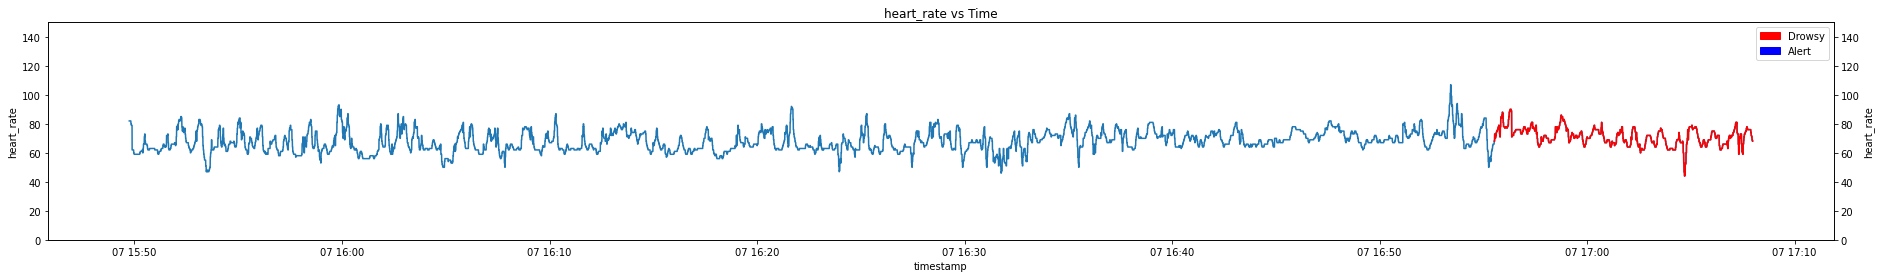

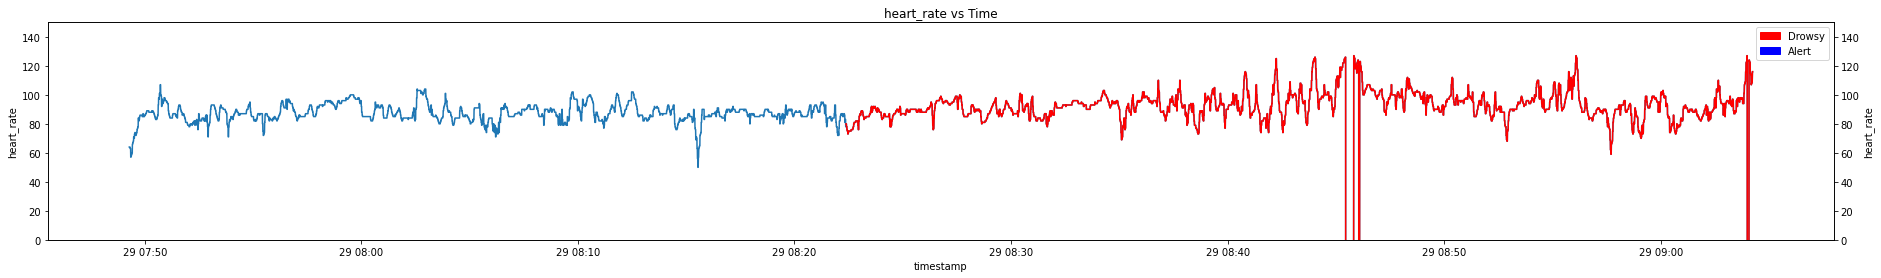

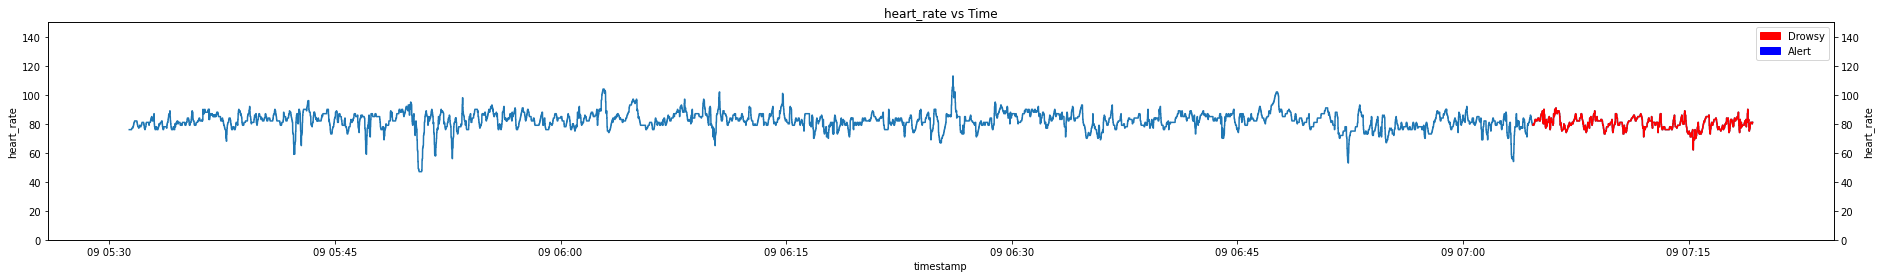

In [20]:
create_timeseries_line_plot(df,"heart_rate",(0,150))
create_timeseries_line_plot(df2,"heart_rate",(0,150))
create_timeseries_line_plot(df3,"heart_rate",(0,150))

We can see that in the first and third data, the heart rate does not have any problem, whereas in the second data there are rows that have a heart rate value lower than 0. This does not make sense so that data having this value must be dropped.

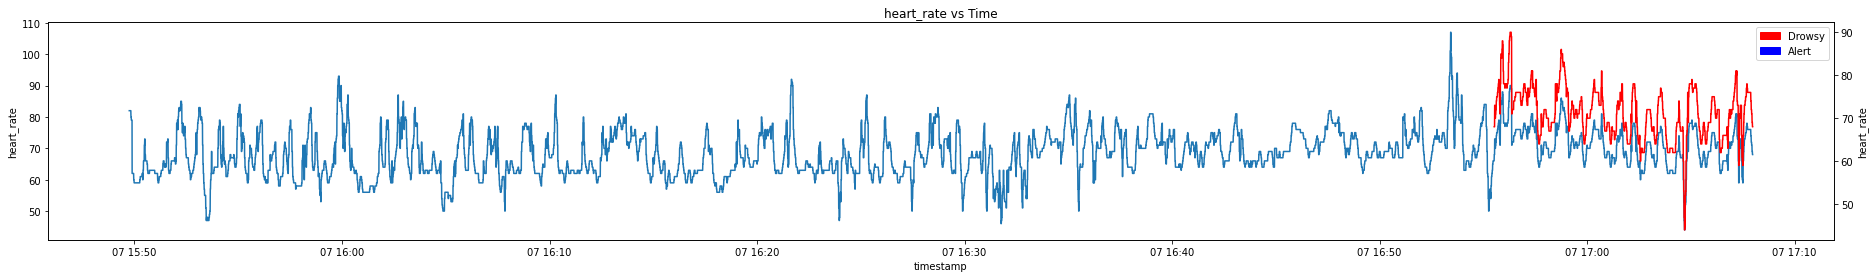

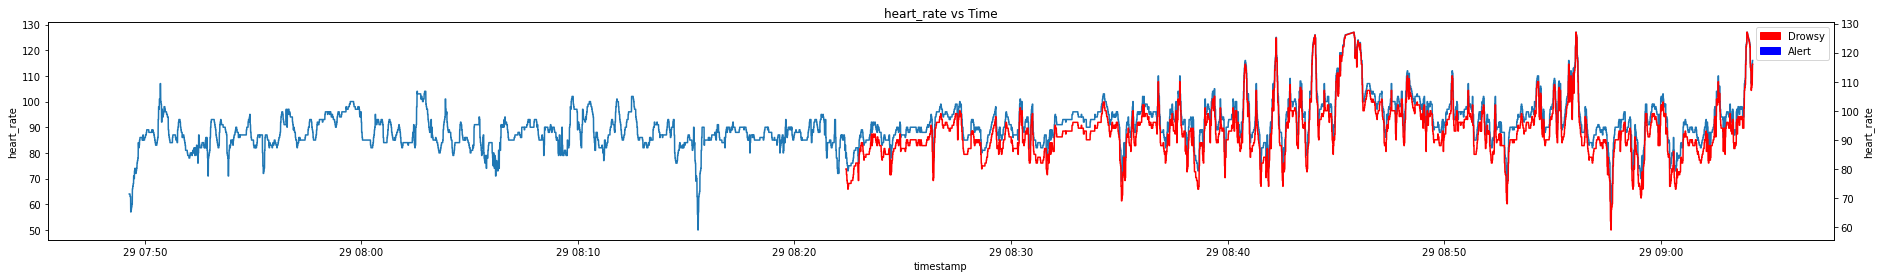

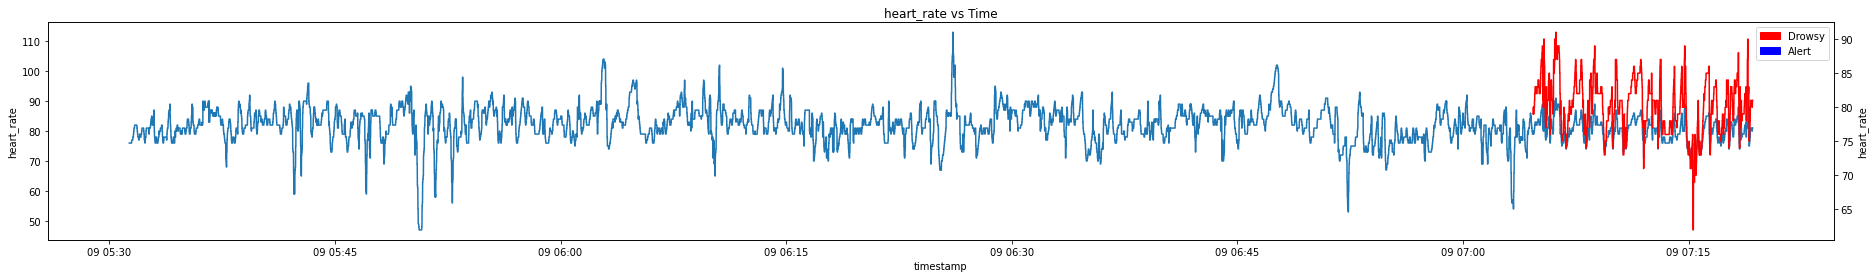

In [21]:
def valid_heart_rate_value(df):
  df = df[df["heart_rate"]>=0]
  return df

df = valid_heart_rate_value(df)
df2 = valid_heart_rate_value(df2)
df3 = valid_heart_rate_value(df3)

create_timeseries_line_plot(df,"heart_rate")
create_timeseries_line_plot(df2,"heart_rate")
create_timeseries_line_plot(df3,"heart_rate")

We can see now that the heart rate value makes more sense because there are no values that far different from the others.

<br>

From the visualization above, it can be seen that in the second data which is the data that I took from my friend, the heart rate value is far more volatile than the data one and three. I think this is because of the different heart rate characteristics of different people

According to research conducted, when in drowsy condition, human heart rate tends to be slower compared when not sleepy. But, from the visualization above it's hard to say that the heart rate decreases in drowsy condition

In [0]:
df_list = [df, df2, df3]

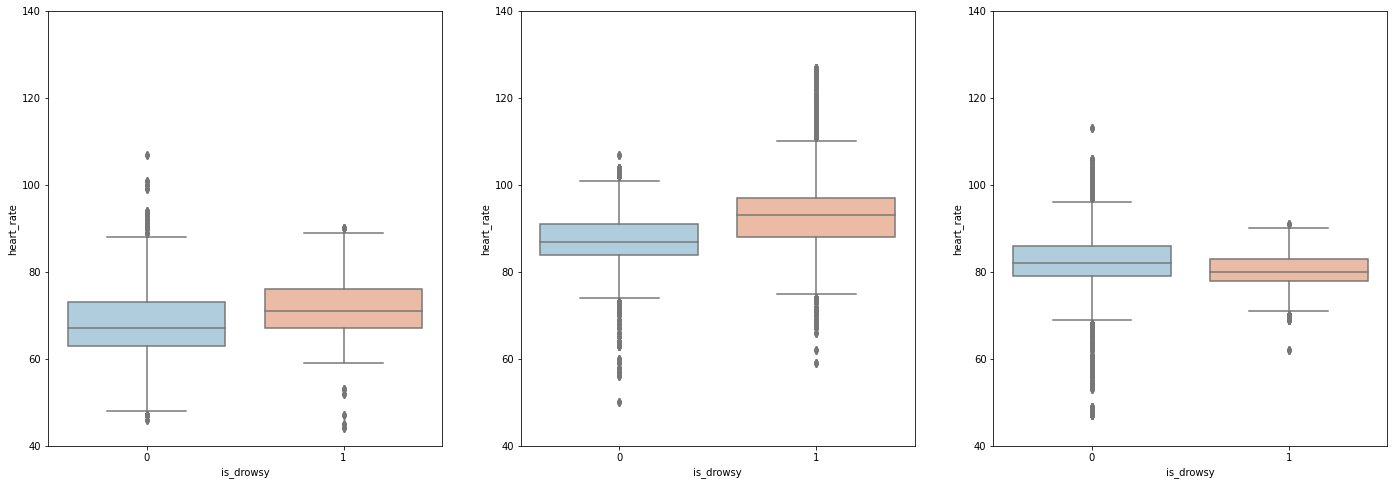

In [23]:
def create_box_plot(df_list,feature,separate_by_is_drowsy=True):
  fig, axes = plt.subplots(nrows=1, ncols=len(df_list), figsize=(24,8))
  for idx,ax in enumerate(axes):
    if(separate_by_is_drowsy):
      sns.boxplot(x="is_drowsy", y=feature,data=df_list[idx],ax=ax,palette="RdBu_r")
    else:
      sns.boxplot(y=feature,data=df_list[idx],ax=ax)
    ax.set(ylim=(40, 140))

create_box_plot(df_list,"heart_rate",True)

Even after using the boxplot, higher heart rate can only be seen in the third data, whereas in the first and second data, when in drowsy condition it is showing relatively higher data distribution of heart rate data

<br>

###### 2.2. Brain Waves

There are 7 types of brain waves that can be recorded by the device used, which is:
* Alpha high
* Alpha Low
* Beta High
* Beta Low
* Gamma Low
* Delta
* Theta

If we follow the results of research that has been done, driver in a drowsy condition will be marked by the strengthening of the delta and theta waves while the alpha wave will the weakening

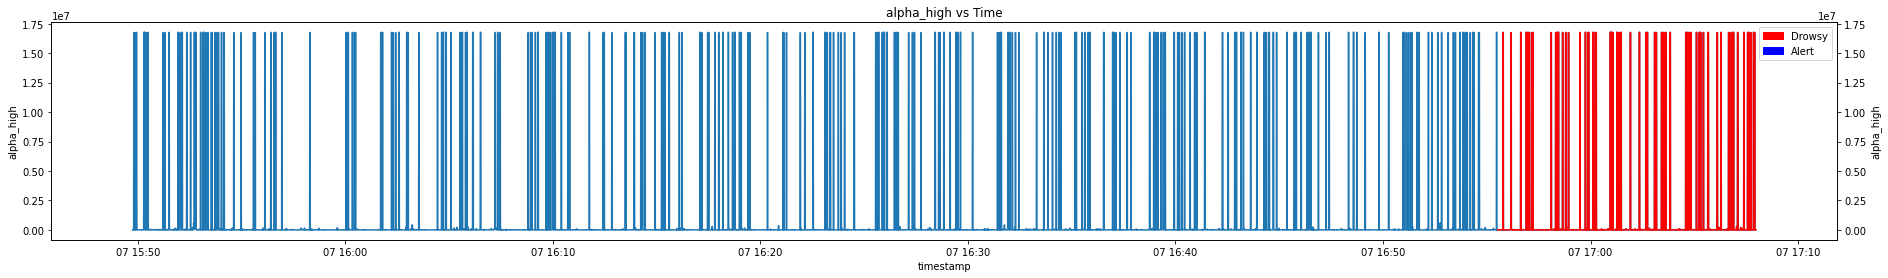

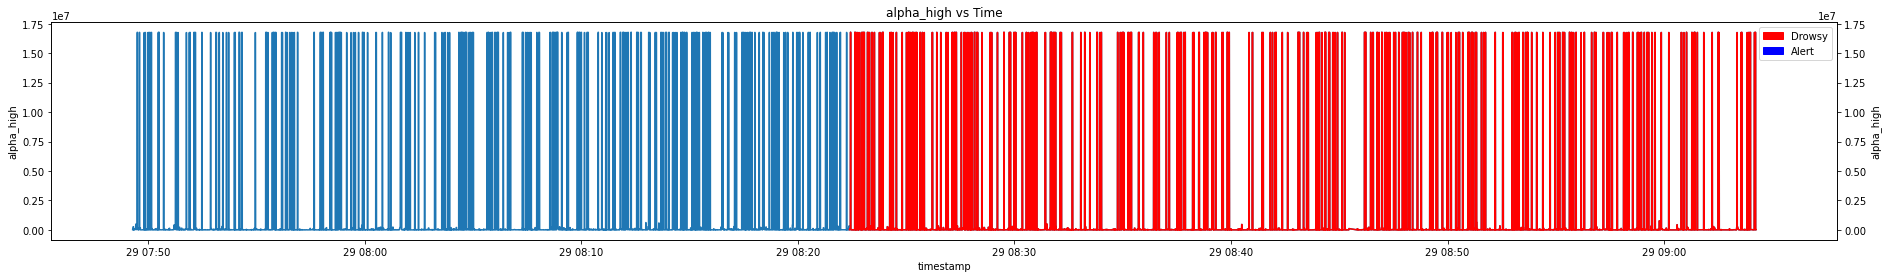

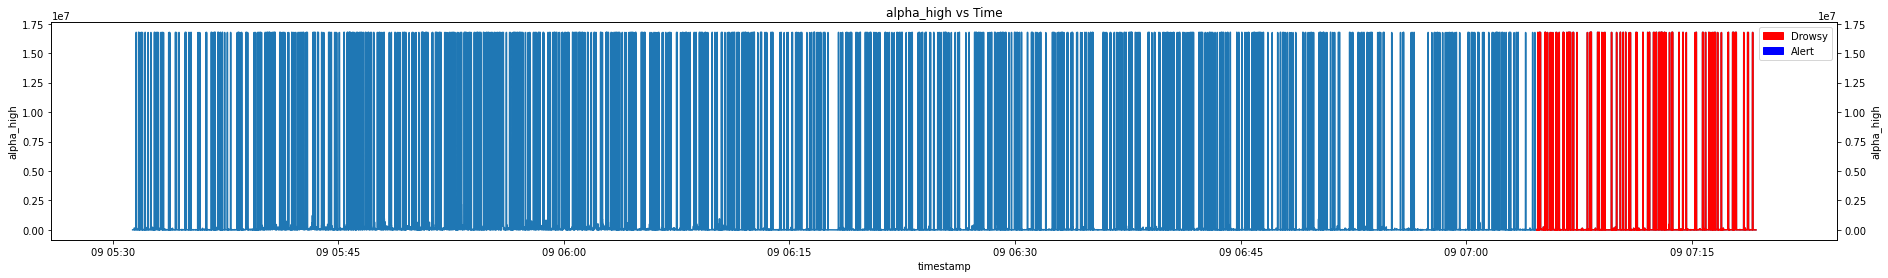

In [24]:
create_timeseries_line_plot(df,"alpha_high")
create_timeseries_line_plot(df2,"alpha_high")
create_timeseries_line_plot(df3,"alpha_high")

It is very clear that the chart above cannot be read easily. After I examine it deeper, the data recorded some value that exceeds 16,000,000 which makes no sense and make the distance between the data is very far between one and each other. This not only appear in the alpha high waves, but also all the other waves

For that reason, rows which has this value will be eliminated and see if the graph becomes more readable.

In [0]:
def valid_brainwaves_value(df):
    df = df[df["alpha_high"]<=15770057.0]
    df = df[df["alpha_low"]<=15770057.0]
    df = df[df["beta_high"]<=15770057.0]
    df = df[df["beta_low"]<=15770057.0]
    df = df[df["gamma_low"]<=15770057.0]
    df = df[df["delta"]<=15770057.0]
    df = df[df["theta"]<=15770057.0]
    return df

In [0]:
df = valid_brainwaves_value(df)
df2 = valid_brainwaves_value(df2)
df3 = valid_brainwaves_value(df3)

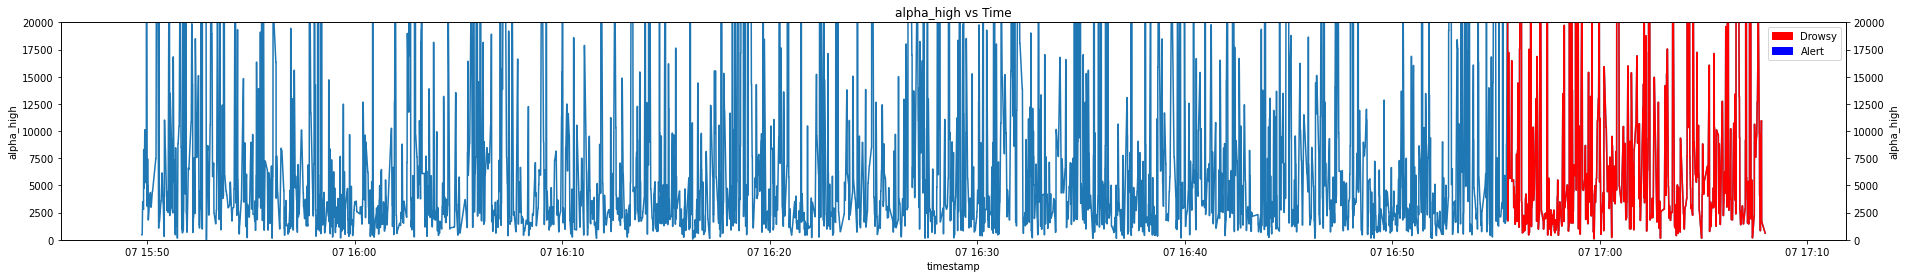

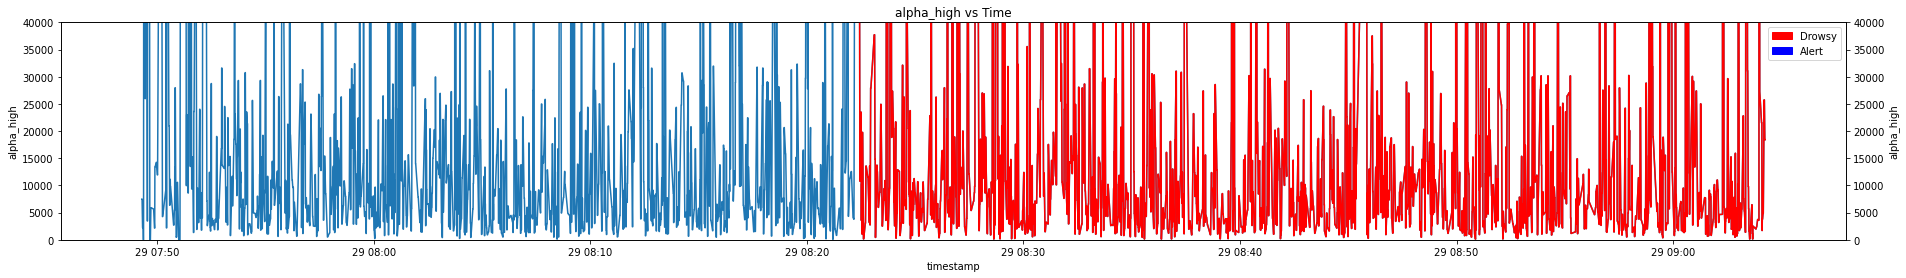

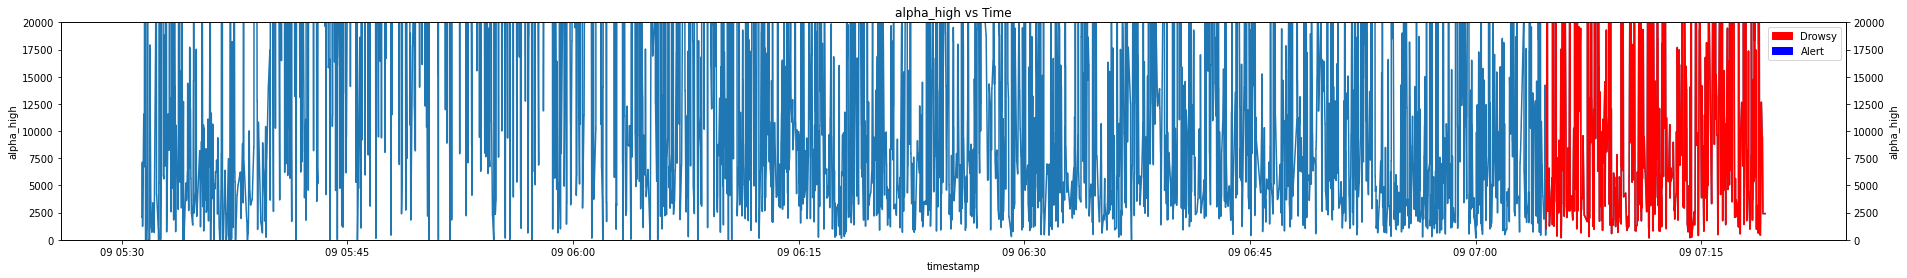

In [27]:
create_timeseries_line_plot(df,"alpha_high",(0,20000))
create_timeseries_line_plot(df2,"alpha_high",(0,40000))
create_timeseries_line_plot(df3,"alpha_high",(0,20000))

Now the graph is seen much more understandable than before. Besides that, we can also see that there are special patterns in these brain waves. 

But with the naked eye I personally have difficulty finding differences in the form of graphics when the driver is in a drowsy condition or not

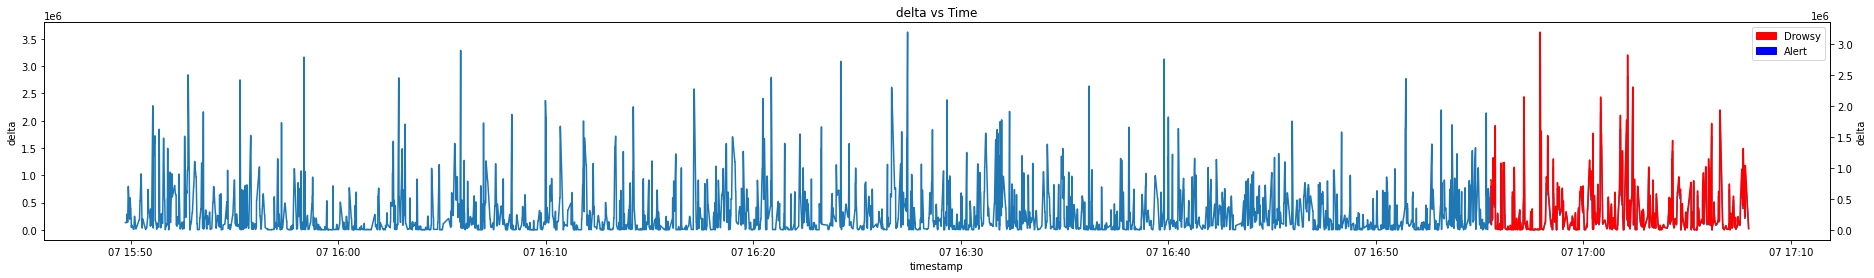

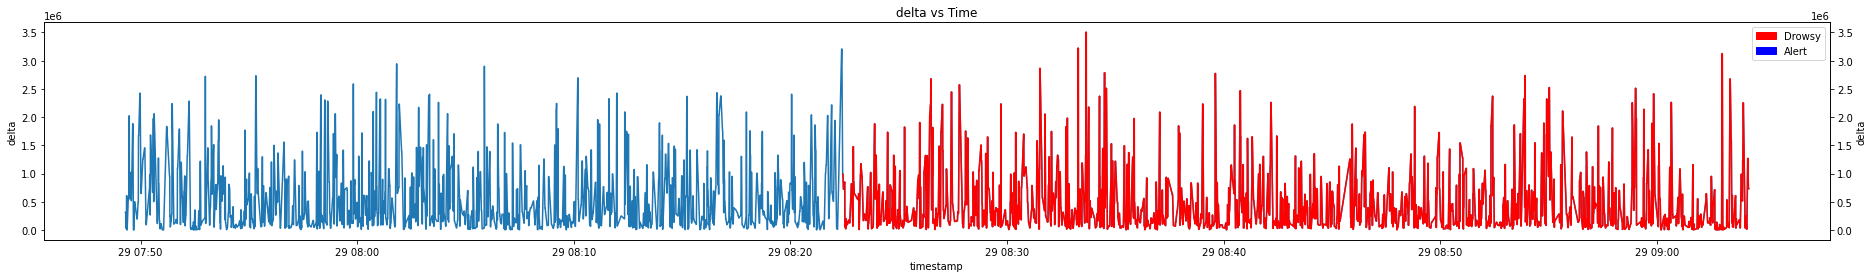

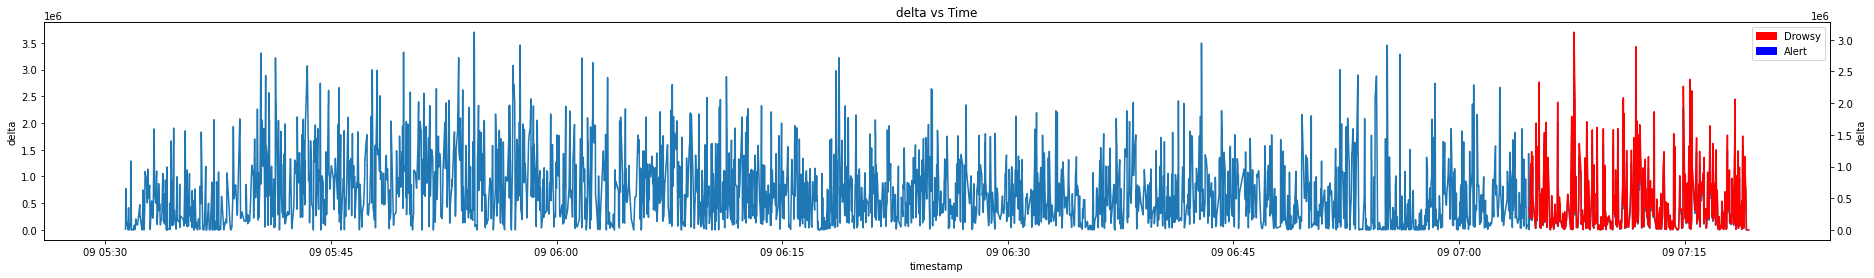

In [32]:
create_timeseries_line_plot(df,"delta")
create_timeseries_line_plot(df2,"delta")
create_timeseries_line_plot(df3,"delta")

In [0]:
def valid_value_only(df):
    df = df[df["heart_rate"]>=0]
    df = df[df["alpha_high"]<=15770057.0]
    df = df[df["alpha_low"]<=15770057.0]
    df = df[df["beta_high"]<=15770057.0]
    df = df[df["beta_low"]<=15770057.0]
    df = df[df["gamma_low"]<=15770057.0]
    df = df[df["delta"]<=15770057.0]
    df = df[df["theta"]<=15770057.0]
    return df
    
def data_preprocessing(df):
    df.dropna(inplace=True)
    df = valid_value_only(df)
    df['timestamp'] = pd.to_datetime(df['timestamp']/1000,unit='s')
    df.set_index("timestamp",inplace=True)
    for x in df.columns:
        if (x!="left_eye_open_prob" and x!="right_eye_open_prob" and x!="target" and x!="is_drowsy"):
            # df[x] = df[x].pct_change()
            df.replace([np.inf, -np.inf], np.nan, inplace=True)
            df.dropna(inplace=True)
            # df[x] = preprocessing.scale(df[x].values)
    return df

In [0]:
def create_data(df,seq_len,future_period):
    df["target"] = df["is_drowsy"].shift(-future_period)
    df.dropna(inplace=True)
    df["target"] = df["target"].astype('Int64')
    df = df[["heart_rate","alpha_high","theta","left_eye_open_prob","right_eye_open_prob","target"]]
    sequential_data = []
    prev_state = deque(maxlen=seq_len)
    for i in df.values:
        prev_state.append([n for n in i[:-1]])
        if len(prev_state)==seq_len:
            sequential_data.append([np.array(prev_state), i[-1]])
    return df, sequential_data

In [0]:
df = data_preprocessing(df)
df.sample(2)

,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
timestamp,,,,,,,,,,,
2020-04-07 16:34:15.986000061,72.0,16577.0,18351.0,18004.0,6388.0,24089.0,593994.0,369124.0,0.996592,0.998313,0
2020-04-07 16:14:24.483999968,73.0,1212.0,7417.0,7062.0,9996.0,4410.0,89045.0,24429.0,0.994291,0.997131,0


In [0]:
df2 = data_preprocessing(df2)
df2.sample(2)

,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
timestamp,,,,,,,,,,,
2020-03-29 08:14:38.558000088,81.0,16026.0,7503.0,13502.0,6856.0,4262.0,1483945.0,49642.0,0.985082,0.995899,0
2020-03-29 08:26:29.365999937,91.0,334283.0,667684.0,207826.0,465174.0,403428.0,2677131.0,1954916.0,0.986359,0.993952,1


In [0]:
SEQ_LEN = 3000
FUTURE_PERIOD_PREDICT = 1500
df, sequential_data = create_data(df,SEQ_LEN,FUTURE_PERIOD_PREDICT)
df.sample(2)

,heart_rate,alpha_high,theta,left_eye_open_prob,right_eye_open_prob,target
timestamp,,,,,,
2020-04-07 15:52:55.433000088,67.0,8657.0,15568.0,0.953766,0.638421,0
2020-04-07 16:09:00.380000114,77.0,24946.0,143725.0,0.992364,0.998313,0


In [0]:
df.sample(2)

,heart_rate,alpha_high,theta,left_eye_open_prob,right_eye_open_prob,target
timestamp,,,,,,
2020-04-07 16:09:23.358000040,62.0,1200.0,4519.0,0.993816,0.996827,0
2020-04-07 16:03:11.694999933,65.0,18200.0,55136.0,0.111816,0.021787,0


In [0]:
df2, sequential_data2 = create_data(df2,SEQ_LEN,FUTURE_PERIOD_PREDICT)
df2.sample(2)

,heart_rate,alpha_high,theta,left_eye_open_prob,right_eye_open_prob,target
timestamp,,,,,,
2020-03-29 08:50:25.959000111,97.0,52414.0,440452.0,0.986109,0.997131,1
2020-03-29 08:17:35.131000042,90.0,5376.0,28308.0,0.995686,0.994615,1


In [0]:
sequential_data = sequential_data + sequential_data2

In [0]:
drowsy=[]
alert=[]
for seq, target in sequential_data:
    if target==0:
        drowsy.append([seq,target])
    else:
        alert.append([seq,target])

random.shuffle(drowsy)
random.shuffle(alert)

lower = min(len(drowsy), len(alert))

drowsy = drowsy[:lower]
alert = alert[:lower]

sequential_data = drowsy + alert
random.shuffle(sequential_data)

In [0]:
def create_training_label_data(sequential_data): 
    X = []
    y =[]
    for seq, target in sequential_data:
        X.append(seq)
        y.append(target)
    return np.array(X),np.array(y)

In [0]:
X,y = create_training_label_data(sequential_data)

In [0]:
X

In [0]:
X = X.astype(np.float32)

In [0]:
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)

In [0]:
for element in X[0].flatten():
  print(element, end="f,")


68.0f,608.0f,4989.0f,0.9961413f,0.9952638f,68.0f,608.0f,4989.0f,0.99568564f,0.9946151f,68.0f,608.0f,4989.0f,0.99748135f,0.9942855f,68.0f,608.0f,4989.0f,0.9952254f,0.9911525f,69.0f,2400.0f,31155.0f,0.9947605f,0.9918758f,69.0f,2400.0f,31155.0f,0.99748135f,0.9907847f,69.0f,2400.0f,31155.0f,0.9947605f,0.9929311f,69.0f,2400.0f,31155.0f,0.9961413f,0.9932752f,69.0f,2400.0f,31155.0f,0.9961413f,0.9911525f,69.0f,3464.0f,4330.0f,0.99568564f,0.9918758f,69.0f,3464.0f,4330.0f,0.99568564f,0.9904127f,69.0f,3464.0f,4330.0f,0.9961413f,0.9929311f,69.0f,3464.0f,4330.0f,0.9970391f,0.9922315f,69.0f,3464.0f,4330.0f,0.9961413f,0.9925832f,69.0f,3464.0f,4330.0f,0.9952254f,0.9880889f,69.0f,15308.0f,72008.0f,0.99568564f,0.9932752f,69.0f,15308.0f,72008.0f,0.9952254f,0.9915162f,70.0f,15308.0f,72008.0f,0.9947605f,0.9922315f,70.0f,15308.0f,72008.0f,0.9947605f,0.9929311f,70.0f,15308.0f,72008.0f,0.9965924f,0.9911525f,70.0f,11873.0f,278102.0f,0.99568564f,0.9932752f,70.0f,11873.0f,278102.0f,0.9965924f,0.9942855f,70.0f,11

In [0]:
y = y.astype(np.float32)

In [0]:
DESIRED_ACCURACY = 0.99

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') >= DESIRED_ACCURACY):  
            print("Reached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [0]:
model = Sequential()
model.add(LSTM(128, input_shape=(3000,5), return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(64))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss="binary_crossentropy",
             optimizer=opt,
             metrics=["accuracy"])
  

history = model.fit(X,
                   y,
                   batch_size=64,
                   epochs=1,
                   callbacks=[callbacks],
                   verbose=1)

253/253 [==============================] - 97s 383ms/step - loss: 0.6061 - accuracy: 0.7068


In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 128)               68608     
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 1)                 129       
Total params: 68,737
Trainable params: 68,737
Non-trainable params: 0
_________________________________________________________________


In [0]:
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(3000,5,1)),
    tf.keras.layers.MaxPooling2D(2,2), 

    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

cnn_model.compile(loss="binary_crossentropy",
          optimizer=opt,
          metrics=["accuracy"],
          )

In [0]:
cnn_model.fit(X.reshape(X.shape[0],3000,5,1),
              y,
              epochs=1,
              steps_per_epoch=16,
              callbacks=[callbacks]
              )

16/16 [==============================] - 4s 261ms/step - loss: 1677709.2500 - accuracy: 0.5183


In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model(cnn_model)
converter.experimental_new_converter = True
cnn_tflite_model = converter.convert()

In [0]:
model_name = "cnn_model1"
# model.save(model_name)
# !zip -r /content/{model_name}.zip /content/{model_name}
open(f"{model_name}.tflite", "wb").write(cnn_tflite_model)

98245720

In [0]:
new_x = []
for x in X:
  new_x.append(x.reshape(3000,5,1))

In [0]:
new_x = np.array(new_x)

In [0]:
new_x.shape

(16140, 3000, 5, 1)

In [0]:
model_predict = model.predict(X)
prediction = np.where(model_predict> 0.5, 1, 0)
print(classification_report(prediction,y))

              precision    recall  f1-score   support

           0       0.99      0.57      0.72     14037
           1       0.25      0.95      0.39      2103

    accuracy                           0.62     16140
   macro avg       0.62      0.76      0.56     16140
weighted avg       0.89      0.62      0.68     16140



In [0]:
print(f1_score(prediction,y))

0.3935908778138209


In [0]:
cnn_model_predict = cnn_model.predict(X.reshape(X.shape[0],3000,5,1))
cnn_prediction = np.where(cnn_model_predict> 0.5, 1, 0)
print(classification_report(cnn_prediction,y))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      8037
           1       0.99      0.99      0.99      8103

    accuracy                           0.99     16140
   macro avg       0.99      0.99      0.99     16140
weighted avg       0.99      0.99      0.99     16140



In [0]:
print(f1_score(cnn_prediction,y))

NameError: ignored

In [0]:
df_test = pd.read_csv("https://raw.githubusercontent.com/pascalisnala/skripsi-machinelearning/master/dataset/data_pascal3.csv")
df_test.sample(2)

,timestamp,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
12232,1586411845874,89.0,6248.0,4803.0,9789.0,8466.0,5468.0,550629.0,20555.0,0.996141,0.997728,0
47999,1586416520070,69.0,17858.0,73791.0,20571.0,16766510.0,10679.0,2220219.0,389946.0,0.998353,0.998886,1


In [0]:
df_test = data_preprocessing(df_test)
df_test.sample(2)

,heart_rate,alpha_high,alpha_low,beta_high,beta_low,gamma_low,delta,theta,left_eye_open_prob,right_eye_open_prob,is_drowsy
timestamp,,,,,,,,,,,
2020-04-09 06:10:48.345000029,89.0,28705.0,14018.0,31264.0,29844.0,25328.0,744380.0,19694.0,0.997039,0.997728,0
2020-04-09 06:44:05.361000061,71.0,50984.0,106012.0,73473.0,42406.0,9486.0,1354290.0,209236.0,0.987175,0.996521,0


In [0]:
df_test, sequential_data_test = create_data(df_test,SEQ_LEN,FUTURE_PERIOD_PREDICT)
df_test.sample(2)

,heart_rate,alpha_high,theta,left_eye_open_prob,right_eye_open_prob,target
timestamp,,,,,,
2020-04-09 07:09:22.755000114,74.0,1686.0,12982.0,0.996141,1.0,1
2020-04-09 05:50:22.933000088,82.0,24364.0,12862.0,0.997481,1.0,0


In [0]:
random.shuffle(sequential_data_test)

In [0]:
X_test, y_test = create_training_label_data(sequential_data_test)

In [0]:
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.experimental_new_converter = True
tflite_model = converter.convert()

In [0]:
expected = model.predict(X_test[0:1])

# Run the model with TensorFlow Lite
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
interpreter.set_tensor(input_details[0]["index"], X_test[0:1, :, :])
interpreter.invoke()
result = interpreter.get_tensor(output_details[0]["index"])

# Assert if the result of TFLite model is consistent with the TF model.
np.testing.assert_almost_equal(expected, result)
print("Done. The result of TensorFlow matches the result of TensorFlow Lite.")

In [0]:
expected

array([[7.250807e-06]], dtype=float32)

In [0]:
result

array([[7.250852e-06]], dtype=float32)

In [0]:
model_name = "model8"
model.save(model_name)
!zip -r /content/{model_name}.zip /content/{model_name}

INFO:tensorflow:Assets written to: model8/assets


INFO:tensorflow:Assets written to: model8/assets


  adding: content/model8/ (stored 0%)
  adding: content/model8/variables/ (stored 0%)
  adding: content/model8/variables/variables.data-00001-of-00002 (deflated 4%)
  adding: content/model8/variables/variables.index (deflated 60%)
  adding: content/model8/variables/variables.data-00000-of-00002 (deflated 76%)
  adding: content/model8/assets/ (stored 0%)
  adding: content/model8/saved_model.pb (deflated 89%)


In [0]:
open(f"{model_name}.tflite", "wb").write(tflite_model)

1823276

In [0]:
model_predict = model.predict(X_test)
prediction = np.where(model_predict> 0.5, 1, 0)
print(classification_report(prediction,y_test))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     10482
           1       1.00      0.48      0.65      6652

    accuracy                           0.80     17134
   macro avg       0.88      0.74      0.76     17134
weighted avg       0.85      0.80      0.78     17134



In [0]:
accuracy_score(prediction,y_test)

0.8000466907902416

In [0]:
f1_score(prediction,y_test)

0.6531686576230006

In [0]:
cnn_model_predict = cnn_model.predict(X_test.reshape(X_test.shape[0],3000,5,1))
cnn_prediction = np.where(cnn_model_predict> 0.5, 1, 0)
print(classification_report(cnn_prediction,y_test))

              precision    recall  f1-score   support

           0       0.04      1.00      0.08       549
           1       1.00      0.19      0.33     16585

    accuracy                           0.22     17134
   macro avg       0.52      0.60      0.20     17134
weighted avg       0.97      0.22      0.32     17134



In [0]:
accuracy_score(cnn_prediction,y_test)

0.22020543947706314

In [0]:
f1_score(cnn_prediction,y_test)

0.32557669981323506

In [0]:
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[    0     1]
 [13908  3226]]


In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [0]:
open("model4.tflite", "wb").write(tflite_model)

1883128

In [0]:
tf.saved_model.save(model, "model4")

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


In [0]:
!zip -r /content/model4.zip /content/model4

  adding: content/model4/ (stored 0%)
  adding: content/model4/variables/ (stored 0%)
  adding: content/model4/variables/variables.data-00000-of-00002 (deflated 81%)
  adding: content/model4/variables/variables.index (deflated 78%)
  adding: content/model4/variables/variables.data-00001-of-00002 (deflated 100%)
  adding: content/model4/saved_model.pb (deflated 91%)
  adding: content/model4/assets/ (stored 0%)


In [0]:
interpreter = tf.lite.Interpreter(model_path="model4.tflite")
interpreter.allocate_tensors()

In [0]:
print(interpreter.get_input_details()[0]['shape'])  
print(interpreter.get_input_details()[0]['dtype'])  

[   1 3000    5]
<class 'numpy.float32'>


In [0]:
print(interpreter.get_output_details()[0]['shape'])  
print(interpreter.get_output_details()[0]['dtype'])  

[]
<class 'numpy.float32'>


In [0]:
!unzip drowsy-detector-v2.zip

unzip:  cannot find or open drowsy-detector-v2.zip, drowsy-detector-v2.zip.zip or drowsy-detector-v2.zip.ZIP.


In [0]:
model = tf.keras.models.load_model('drowsy-detector-v2')

OSError: ignored

In [0]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
# converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
# converter.allow_custom_ops = True
# converter.experimental_new_converter = True
tflite_model = converter.convert()  

In [0]:
open("drowsy-detector-v21.tflite", "wb").write(tflite_model)